# SETUP
- - -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Dejavu Sans"

import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
file_path = '/Users/quartz/data/iot-data/cansim-0800020-eng-6674700030567901031.csv'

In [3]:
data_raw = pd.read_csv(file_path, skiprows=6, skipfooter=9)
data_raw.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [5]:
data_raw.dtypes

Adjustments            object
Unadjusted              int64
Seasonally adjusted     int64
dtype: object

In [6]:
# 월별 끝일 삽일

from pandas.tseries.offsets import MonthEnd

# data_raw['Adjustments'] = 
data_raw.Adjustments = pd.to_datetime(data_raw['Adjustments']) + MonthEnd(1)
data_raw = data_raw.set_index('Adjustments')
data_raw.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


### Plotting

2011-01-01 00:00:00 (240, 1) (73, 1)


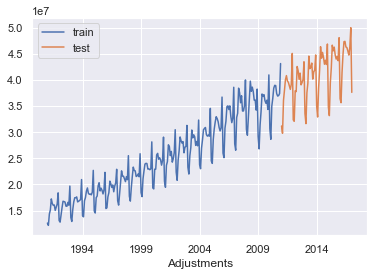

In [7]:
# 기준점 형성(Timestamp)
split_date = pd.Timestamp('01-01-2011')

# Unadjusted feature만 활용해서 dataframe을 만든다
train = data_raw.loc[:split_date, ['Unadjusted']]
test = data_raw.loc[split_date:, ['Unadjusted']]

print(split_date, train.shape, test.shape)

# plot

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

### preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.fit_transform(test)

train_sc_df = pd.DataFrame(data=train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(data=test_sc, columns=['Scaled'], index=test.index)

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

train_sc_df.head()

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [9]:
for shift in range(1, 13):
    train_sc_df['shift_{}'.format(shift)] = train_sc_df['Scaled'].shift(shift)
    test_sc_df['shift_{}'.format(shift)] = test_sc_df['Scaled'].shift(shift)

In [10]:
train_sc_df.head(20)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


### make dataset(train, test)

In [11]:
# train, test
X_train_df = train_sc_df.dropna().drop('Scaled', axis=1)
y_train_df = train_sc_df.dropna()[['Scaled']]
X_test_df = test_sc_df.dropna().drop('Scaled', axis=1)
y_test_df = test_sc_df.dropna()[['Scaled']]

# DataFrame -> ndarray
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values

# 2차원 데이터(size, feature)를 3차원 데이터(size, feature, time)으로.
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

# check shape
X_train.shape, X_train_t.shape, X_test.shape, X_test_t.shape

((228, 12), (228, 12, 1), (61, 12), (61, 12, 1))

### LSTM Modeling

In [13]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()

Using TensorFlow backend.


In [14]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
# 손실 이력 객체 생성
history = LossHistory() 
history.init()

In [15]:
model = Sequential() # Sequential Model
model.add(LSTM(100, input_shape=(12,1))) # (timestamp, feature) 
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_t, y_train, epochs=100, batch_size=30, verbose=2, callbacks=[history])
y_pred = model.predict(X_test_t)

Epoch 1/100
 - 1s - loss: 0.1638
Epoch 2/100
 - 0s - loss: 0.0272
Epoch 3/100
 - 0s - loss: 0.0159
Epoch 4/100
 - 0s - loss: 0.0156
Epoch 5/100
 - 0s - loss: 0.0108
Epoch 6/100
 - 0s - loss: 0.0103
Epoch 7/100
 - 0s - loss: 0.0091
Epoch 8/100
 - 0s - loss: 0.0088
Epoch 9/100
 - 0s - loss: 0.0087
Epoch 10/100
 - 0s - loss: 0.0084
Epoch 11/100
 - 0s - loss: 0.0084
Epoch 12/100
 - 0s - loss: 0.0081
Epoch 13/100
 - 0s - loss: 0.0082
Epoch 14/100
 - 0s - loss: 0.0084
Epoch 15/100
 - 0s - loss: 0.0082
Epoch 16/100
 - 0s - loss: 0.0083
Epoch 17/100
 - 0s - loss: 0.0081
Epoch 18/100
 - 0s - loss: 0.0081
Epoch 19/100
 - 0s - loss: 0.0081
Epoch 20/100
 - 0s - loss: 0.0079
Epoch 21/100
 - 0s - loss: 0.0078
Epoch 22/100
 - 0s - loss: 0.0077
Epoch 23/100
 - 0s - loss: 0.0077
Epoch 24/100
 - 0s - loss: 0.0077
Epoch 25/100
 - 0s - loss: 0.0076
Epoch 26/100
 - 0s - loss: 0.0076
Epoch 27/100
 - 0s - loss: 0.0076
Epoch 28/100
 - 0s - loss: 0.0075
Epoch 29/100
 - 0s - loss: 0.0075
Epoch 30/100
 - 0s - lo

### Visualization

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
pred = y_pred

loss_ax.plot(pred, 'b', label='pred')
loss_ax.plot(y_test, 'r', label='act')
loss_ax.legend(loc='upper left')

plt.show()

In [ ]:
# loss

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 태양광 LSTM
- - -

### EDA

In [4]:
!ls /Users/quartz/data/iot-data/solar_data.csv

/Users/quartz/data/iot-data/solar_data.csv


In [9]:
file_path = '/Users/quartz/data/iot-data/solar_data.csv'
solar_raw = pd.read_csv(file_path, engine='python')
solar_raw.iloc[:, :15].head()

,날짜,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,15Hr,16Hr,17Hr,18Hr
0,160701,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,1.1,7.3,1.5,0.2
1,160702,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,111.2,72.5,16.8,15.4
2,160703,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,0.0,0.0,0.0,4.6
3,160704,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,146.1,148.4,24.4,9.8
4,160705,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,184.8,153.4,84.0,48.0


In [4]:
# 발전량, 강수량, 습도, 풍속, 기온 | 일조량, 미세먼지

solar_raw.columns

Index(['날짜', '5Hr', '6Hr', '7Hr', '8Hr', '9Hr', '10Hr', '11Hr', '12Hr', '13Hr',
       '14Hr', '15Hr', '16Hr', '17Hr', '18Hr', '19Hr', '20Hr', '충전시간발전량',
       '일출시간', '일몰시간', '강수량5hr', '강수량6hr', '강수량7hr', '강수량8hr', '강수량9hr',
       '강수량10hr', '강수량11hr', '강수량12hr', '강수량13hr', '강수량14hr', '강수량15hr',
       '강수량16hr', '강수량17hr', '강수량18hr', '강수량19hr', '강수량20hr', '습도5hr', '습도6hr',
       '습도7hr', '습도8hr', '습도9hr', '습도10hr', '습도11hr', '습도12hr', '습도13hr',
       '습도14hr', '습도15hr', '습도16hr', '습도17hr', '습도18hr', '습도19hr', '습도20hr',
       '풍속5hr', '풍속6hr', '풍속7hr', '풍속8hr', '풍속9hr', '풍속10hr', '풍속11hr',
       '풍속12hr', '풍속13hr', '풍속14hr', '풍속15hr', '풍속16hr', '풍속17hr', '풍속18hr',
       '풍속19hr', '풍속20hr', '기온5hr', '기온6hr', '기온7hr', '기온8hr', '기온9hr',
       '기온10hr', '기온11hr', '기온12hr', '기온13hr', '기온14hr', '기온15hr', '기온16hr',
       '기온17hr', '기온18hr', '기온19hr', '기온20hr'],
      dtype='object')

In [4]:
total = solar_raw['충전시간발전량']
# '5Hr', '6Hr', '7Hr', '8Hr', '9Hr', '10Hr'
sub = solar_raw[['10Hr', '11Hr', '12Hr', '13Hr', '14Hr', '15Hr', '16Hr']]

In [ ]:
solar_raw['충전시간발전량'].tail()

In [ ]:
sub.tail()

In [ ]:
# 충전시간발전량은 오전 10시부터 오후 4시까지 발전량의 합이다

for i in range(10):
    print(np.sum(sub.values[i]), total.values[i])

In [ ]:
# 시간대(Hr)

solar_raw.iloc[:, :18].tail()

In [ ]:
# 강수량()

solar_raw.iloc[:, 20:36].tail()

In [ ]:
# 습도()

solar_raw.iloc[:, 36:52].tail()

In [ ]:
# 풍속()

solar_raw.iloc[:, 52:68].tail()

In [ ]:
# 기온()

solar_raw.iloc[:, 68:84].tail()

In [ ]:
# data shape 확인

solar_raw.shape # 1년치 시계열 데이터

In [ ]:
# data type 확인 - int64: 일출시간, 일몰시간, 20Hr으로 구성. float64: 

solar_raw.dtypes

In [ ]:
# 종속변수(충전시간발전량) 뜯어보기

solar_raw['충전시간발전량'].describe()

In [ ]:
# 독립변수 간 상관관계 뜯어보기

solar_raw.corr()

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(solar_revise.corr(), cmap="YlGnBu")
plt.show()

In [ ]:
!ls ./tmp

In [ ]:
# 변수 분포 살펴보기
columns = list(solar_raw.columns)

for column in columns:

    y = solar_raw[column].values

    sns.distplot(y)
    plt.xticks([-0.5, 1.5])
    plt.yticks([0, 1])
    plt.title("{} distplot".format(column))
    plt.savefig('/Users/quartz/Dropbox/iot-data-practice/tmp/{}.png'.format(column))

In [ ]:
# 전체 feature(독립변수) 확인 : Hr, 충전시간발전량, 일출시간, 일몰시간, 강수량, 습도, 풍속, 기온

solar_raw.columns

In [ ]:
# feature 하나씩 뜯어보기

solar_raw.iloc[:1, 17:34]

In [ ]:
# 결측치 확인 : 0개

solar_raw.isna().sum()[50:100]

In [ ]:
solar_raw.describe()

### preprocessing

In [5]:
solar_raw['날짜'] = solar_raw['날짜'].apply(lambda x: "20"+str(x))
solar_raw.tail()

,날짜,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
377,20170713,0.0,14.8,86.0,163.9,211.6,256.6,246.5,263.4,266.8,...,23.299999,23.1,23.1,23.200001,23.4,24.200001,24.500000,24.400000,23.400000,25.700001
378,20170714,0.0,0.8,38.0,108.7,200.5,322.6,366.4,348.6,262.8,...,25.000000,24.6,25.1,24.200001,24.0,23.900000,24.900000,24.900000,25.299999,25.400000
379,20170715,0.0,4.7,47.8,98.2,196.9,110.6,97.6,138.2,174.7,...,24.000000,24.0,24.0,23.500000,23.4,23.200001,23.400000,23.799999,24.799999,25.000000
380,20170716,0.0,0.0,57.0,181.8,197.7,266.0,295.2,260.1,312.1,...,24.299999,24.1,23.9,24.400000,23.9,24.600000,24.600000,24.700001,24.500000,25.299999
381,20170717,0.0,8.0,81.9,172.7,230.4,178.9,228.4,189.1,195.4,...,24.200001,23.9,24.5,24.700001,25.1,24.200001,24.700001,24.900000,24.400000,24.000000


In [6]:
# 월별 끝일 삽일
solar_raw['날짜'] = pd.to_datetime(solar_raw['날짜'])
solar_raw = solar_raw.set_index('날짜')
solar_raw.head()

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,...,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
2016-07-02,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,...,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2016-07-03,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,...,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
2016-07-04,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,...,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
2016-07-05,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,...,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


### 새로운 데이터셋 solar_revise 만들기

- 현재 데이터(시간 당 발전량, 기온, 강수량, 습도, 풍속)로 내일 데이터(충전시간발전량) 예측하기

In [ ]:
solar_1 = solar_raw.drop(['충전시간발전량'], axis=1)
solar_2 = solar_raw['충전시간발전량']
solar_2 = solar_2.values

solar_2 = solar_2[1:]
solar_2[:4]
solar_2 = np.append(solar_2, np.nan)

solar_1.shape, solar_2.shape

In [ ]:
solar_1['충전시간발전량'] = solar_2
solar_1.dropna(inplace=True)

solar_revise = solar_1.copy()

In [9]:
solar_revise['20Hr'] = solar_revise['20Hr'].astype('float64')
solar_revise.to_pickle('./solar_revise.pkl')

In [10]:
solar_revise = pd.read_pickle('./solar_revise.pkl')
solar_revise.tail()

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr,충전시간발전량
날짜,,,,,,,,,,,,,,,,,,,,,
2017-07-12,0.0,3.9,29.7,79.7,249.6,324.4,378.2,401.4,396.0,356.4,...,22.299999,21.299999,22.400000,22.6,22.500000,22.299999,22.500000,22.200001,23.200001,1625.2
2017-07-13,0.0,14.8,86.0,163.9,211.6,256.6,246.5,263.4,266.8,138.9,...,23.100000,23.100000,23.200001,23.4,24.200001,24.500000,24.400000,23.400000,25.700001,1764.5
2017-07-14,0.0,0.8,38.0,108.7,200.5,322.6,366.4,348.6,262.8,199.3,...,24.600000,25.100000,24.200001,24.0,23.900000,24.900000,24.900000,25.299999,25.400000,937.2
2017-07-15,0.0,4.7,47.8,98.2,196.9,110.6,97.6,138.2,174.7,188.9,...,24.000000,24.000000,23.500000,23.4,23.200001,23.400000,23.799999,24.799999,25.000000,1945.4
2017-07-16,0.0,0.0,57.0,181.8,197.7,266.0,295.2,260.1,312.1,367.8,...,24.100000,23.900000,24.400000,23.9,24.600000,24.600000,24.700001,24.500000,25.299999,1092.1


### Feature Engineering

```
1. 데이터셋 중 10Hr ~ 16Hr 만 사용하기

2. 데이터셋을 4개의 구간으로 나누기
- 5~8 : 5_8Hr
- 9~12 : 9_12Hr
- 13~16 : 13_16Hr
- 17~20 : 17_20Hr
```

In [170]:
solar_1 = solar_revise.iloc[:, 5:12]
solar_2 = solar_revise.iloc[:, 21:28]
solar_3 = solar_revise.iloc[:, 37:44]
solar_4 = solar_revise.iloc[:, 53:60]
solar_5 = solar_revise.iloc[:, 69:76]
solar_6 = solar_revise.iloc[:, -1:]

solar_new = pd.concat([solar_1, solar_2, solar_3, solar_4, solar_5, solar_6], axis=1)
solar_new.tail()

,10Hr,11Hr,12Hr,13Hr,14Hr,15Hr,16Hr,강수량10hr,강수량11hr,강수량12hr,강수량13hr,강수량14hr,강수량15hr,강수량16hr,습도10hr,습도11hr,습도12hr,습도13hr,습도14hr,습도15hr,습도16hr,풍속10hr,풍속11hr,풍속12hr,풍속13hr,풍속14hr,풍속15hr,풍속16hr,기온10hr,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,충전시간발전량
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-12,324.4,378.2,401.4,396.0,356.4,309.4,226.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,96.0,96.0,96.0,96.0,95.0,94.0,1.9,0.4,0.3,0.8,0.9,1.4,1.7,23.000000,22.299999,22.299999,21.299999,22.400000,22.6,22.500000,1625.2
2017-07-13,256.6,246.5,263.4,266.8,138.9,233.0,220.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,95.0,95.0,94.0,94.0,94.0,94.0,2.4,1.1,0.1,0.1,0.6,0.7,0.4,23.700001,23.299999,23.100000,23.100000,23.200001,23.4,24.200001,1764.5
2017-07-14,322.6,366.4,348.6,262.8,199.3,151.1,113.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,96.0,97.0,97.0,97.0,98.0,98.0,0.6,0.1,0.8,0.4,0.4,1.2,0.2,24.900000,25.000000,24.600000,25.100000,24.200001,24.0,23.900000,937.2
2017-07-15,110.6,97.6,138.2,174.7,188.9,142.5,84.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,94.0,95.0,95.0,95.0,96.0,96.0,0.1,0.4,0.1,0.3,0.5,0.6,0.3,24.500000,24.000000,24.000000,24.000000,23.500000,23.4,23.200001,1945.4
2017-07-16,266.0,295.2,260.1,312.1,367.8,272.4,171.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,98.0,98.0,96.0,96.0,97.0,99.0,0.4,0.4,0.3,0.3,0.4,0.2,0.3,24.700001,24.299999,24.100000,23.900000,24.400000,23.9,24.600000,1092.1


In [171]:
solar_new.shape

(381, 36)

In [125]:
y = solar_revise.iloc[0:1, :16]
y

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,15Hr,16Hr,17Hr,18Hr,19Hr,20Hr
날짜,,,,,,,,,,,,,,,,
2016-07-01,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,1.1,7.3,1.5,0.2,0.0,0.0


In [151]:
solar_revise = solar_revise.drop(['일출시간', '일몰시간'], axis=1)

In [152]:
solar_revise.columns

Index(['5Hr', '6Hr', '7Hr', '8Hr', '9Hr', '10Hr', '11Hr', '12Hr', '13Hr', '14Hr', '15Hr', '16Hr', '17Hr', '18Hr', '19Hr', '20Hr', '강수량5hr', '강수량6hr', '강수량7hr', '강수량8hr', '강수량9hr', '강수량10hr', '강수량11hr', '강수량12hr', '강수량13hr', '강수량14hr', '강수량15hr', '강수량16hr', '강수량17hr', '강수량18hr', '강수량19hr', '강수량20hr', '습도5hr', '습도6hr', '습도7hr', '습도8hr', '습도9hr', '습도10hr', '습도11hr', '습도12hr', '습도13hr', '습도14hr', '습도15hr', '습도16hr', '습도17hr', '습도18hr', '습도19hr', '습도20hr', '풍속5hr', '풍속6hr', '풍속7hr', '풍속8hr', '풍속9hr', '풍속10hr', '풍속11hr', '풍속12hr', '풍속13hr', '풍속14hr', '풍속15hr', '풍속16hr', '풍속17hr', '풍속18hr', '풍속19hr', '풍속20hr', '기온5hr', '기온6hr', '기온7hr', '기온8hr', '기온9hr', '기온10hr', '기온11hr', '기온12hr', '기온13hr', '기온14hr', '기온15hr', '기온16hr', '기온17hr', '기온18hr', '기온19hr', '기온20hr', '충전시간발전량'], dtype='object')

In [156]:
from IPython.display import clear_output # clear_output() 으로 아웃풋 제거 가능

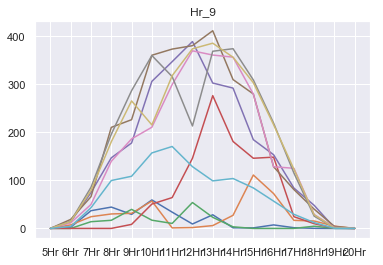

In [157]:
# 변수 분포 살펴보기

n = len(solar_revise)

for i in range(n)[:10]:
    data = solar_revise.iloc[i:i+1,:16]
    x = list(solar_revise.iloc[i:i+1,:16].columns)
    y = list(solar_revise.iloc[i:i+1,:16].values[0])

    plt.title('Hr_{}'.format(i))
    plt.plot(x, y)
    plt.savefig('./tmp_2/Hr_{}'.format(i))
    clear_output()

In [ ]:
### 새로운 Feature 만들기 (Hr, 기온, 습도, 풍속, 강수량)

### 모델링 함수 만들기

##### package, function

In [200]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import keras
import keras.backend as K
from keras.layers import LSTM, Dense, Input, Embedding, Dropout
from keras.models import Sequential
from keras.models import Model
from keras.wrappers.scikit_learn import KerasRegressor

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc')

from keras.callbacks import CSVLogger
csv_logger = CSVLogger('training.log')

def dataset_reshape(dataset, window_size=1):
    data = []
    for i in range(len(dataset) - window_size - 1):
        change_data = dataset[i:(i+window_size)]
        data.append(np.array(change_data))
    return np.array(data)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
# 손실 이력 객체 생성
history = LossHistory() 
history.init()

##### modeling: LSTM

In [201]:
def make_model(dataset, input_shape=(0, 0), epochs=[10], batch_size=[30], dropout_rate=[0.2], layers=50, output_dim=1, cv=3):

    columns = list(dataset.columns)

    # 기준점 형성(Timestamp)
    split_date = pd.Timestamp('2017-04-15')

    # Unadjusted feature만 활용해서 dataframe을 만든다
    train = dataset.loc[:split_date, columns]
    test = dataset.loc[split_date:, columns]

    # scaling
    sc = MinMaxScaler()
    train_sc = sc.fit_transform(train)
    test_sc = sc.transform(test)

    # train, test
    train_sc_df = pd.DataFrame(data=train_sc, columns=columns, index=train.index)
    test_sc_df = pd.DataFrame(data=test_sc, columns=columns, index=test.index)

    X_train_df = train_sc_df.iloc[:, :-1]
    y_train_df = train_sc_df.iloc[:, -1:]

    X_test_df = test_sc_df.iloc[:, :-1]
    y_test_df = test_sc_df.iloc[:, -1:]

    # 2차원 데이터(size, feature)를 3차원 데이터(size, feature, time)으로.
    X_train = dataset_reshape(X_train_df, 7)
    y_train = dataset_reshape(y_train_df['충전시간발전량'], 7)

    X_test = dataset_reshape(X_test_df, 7)
    y_test = dataset_reshape(y_test_df['충전시간발전량'], 7)

    # 모델 함수 만들기
    def create_model(dropout_rate=0.0):

        activation='relu'
        dropout_rate=0.0
        init_mode='uniform'
        optimizer='adam'
        lr=0.01
        momentum=0

        #create model
        model = Sequential()
        model.add(LSTM(layers, input_shape=input_shape))
        model.add(Dropout(dropout_rate))
        model.add(Dense(output_dim))
        model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])    
        return model

    # create model
    model = KerasRegressor(build_fn=create_model, epochs=30, batch_size=30)

    # Use scikit-learn to grid search
    # activation = ['relu', 'tahn', 'sigmoid']
    # optimizer = ['adam', 'SGD', 'RMSprop']
    # dropout_rate = dropout_rate

    # grid search epochs, batch size
    epochs = epochs
    batch_size = batch_size
    param_grid = dict(epochs=epochs, batch_size=batch_size, dropout_rate=dropout_rate)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=1, cv=cv)
    grid = grid.fit(X_train, y_train, callbacks=[history, csv_logger, EarlyStopping])
    
    clear_output()
    
    # make graph
    y_pred = grid.predict(X_test)
    y_test_tuple = (y_test[0], y_test[1], y_test[2], y_test[3], y_test[4], y_test[5], y_test[6])
    y_pred_tuple = (y_pred[0], y_pred[1], y_pred[2], y_pred[3], y_pred[4], y_pred[5], y_pred[6])

    plt.figure(figsize=(20, 10))
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(np.concatenate(y_test_tuple), 'b', label='act')
    loss_ax.plot(np.concatenate(y_pred_tuple), 'r', label='pred')

    loss_ax.legend(loc='lower right')
    plt.show()
    
    # loss graph
    plt.plot(history.losses)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    
    return grid

<Figure size 1440x720 with 0 Axes>

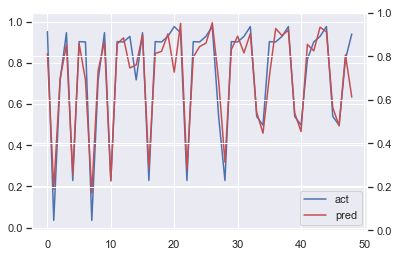

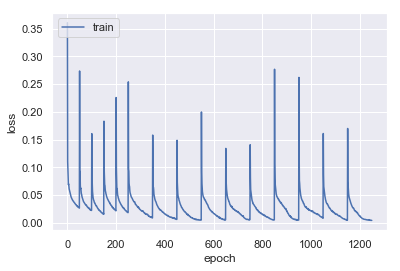

In [192]:
grid_1 = make_model(dataset=solar_revise, input_shape=(7, 80), epochs=[100], dropout_rate=[0.2, 0.4], layers=100, output_dim=7)

In [196]:
grid_1.best_params_

{'batch_size': 30, 'dropout_rate': 0.2, 'epochs': 100}

<Figure size 1440x720 with 0 Axes>

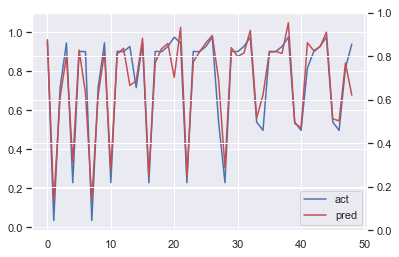

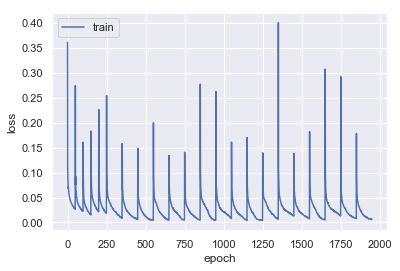

In [198]:
grid_2 = make_model(dataset=solar_new, input_shape=(7, 35), epochs=[100], dropout_rate=[0.2, 0.4], layers=100, output_dim=7)

In [202]:
grid_1.cv_results_

{'mean_fit_time': array([25.58346502, 26.8125426 ]),
 'std_fit_time': array([1.39126792, 1.79301914]),
 'mean_score_time': array([4.33056895, 5.68761428]),
 'std_score_time': array([0.69319856, 1.63444992]),
 'param_batch_size': masked_array(data=[30, 30],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_dropout_rate': masked_array(data=[0.2, 0.4],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_epochs': masked_array(data=[100, 100],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 30, 'dropout_rate': 0.2, 'epochs': 100},
  {'batch_size': 30, 'dropout_rate': 0.4, 'epochs': 100}],
 'split0_test_score': array([-0.01904786, -0.04103963]),
 'split1_test_score': array([-0.01307647, -0.01557184]),
 'split2_test_score': array([-0.02084601, -0.01924739]),
 'mean_test_score': array([-0.01764543, -0.02530778]),
 'std_test_score': array([0.0

### save models

In [197]:
grid_1.best_estimator_.model.save("grid_1.h5")

In [199]:
grid_2.best_estimator_.model.save("grid_2.h5")

### log history

# Scikit-learn, Statsmodels
- - -

### preprocessing

```

#1

    1. 20Hr, 일몰시간, 일출시간, 날짜 : int64 -> float64


#2
```

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
solar_data = solar_raw.copy()
solar_data = solar_data.astype('float32', copy=True)
solar_data.tail()

In [ ]:
X_data = solar_data.drop(['충전시간발전량'], axis=1)
y_data = solar_data['충전시간발전량']
y_data.tail()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### modeling: scikit-learn
- - -

```
1. x, y train, text dataset 만들기
2. linear regression으로 모델링(statsmodels)
3. 다중회귀
4. 다중 공선성 확인, 제거(PCA)
5. 파라미터 튜닝
```

### scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train_df.tail()

In [ ]:
LR = LinearRegression(fit_intercept=True)
model_lr_1 = LR.fit(X_train_df.values, y_train_df.values)

# 성능평가
y_pred = model_lr_1.predict(X_test_df.values)
mse = (np.square(y_pred - y_test_df.values)).mean(axis=0)
mse

In [ ]:
from sklearn.metrics import explained_variance_score

explained_variance_score(y_test_df.values, y_pred)

In [ ]:
# 교차 검증

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_lr_1, X_data, y_data, cv=50, scoring='r2')
scores = np.mean(scores)
scores

### modeling: statsmodels

- 다중공선성 제거

In [88]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_lr_2 = sm.OLS(y_train_df, X_train_df)
result_2 = model_lr_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                충전시간발전량   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     30.31
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           8.86e-82
Time:                        16:04:24   Log-Likelihood:                 87.986
No. Observations:                 289   AIC:                            -15.97
Df Residuals:                     209   BIC:                             277.3
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
5Hr        -7.269e-13   5.52e-13     -1.316      0.190   -1.82e-12    3.62e-13
6Hr           -0.3186      0.135     -2.359      0.019      -0.585      -0.052
7Hr            0.0946      0.127      0.742      0.459      -0.157       0.346
8Hr           -0.0153      0.142     -0.107      0.915      -0.295       0.265
9Hr            0.1690      0.168      1.003      0.317      -0.163       0.501
10Hr          -0.0347      0.152     -0.229      0.819      -0.334       0.264
11Hr           0.1288      0.171      0.754      0.451      -0.208       0.466
12Hr           0.0479      0.160      0.300      0.764      -0.267       0.362
13Hr          -0.0219      0.160     -0.136      0.892      -0.338       0.294
14Hr          -0.0389      0.160     -0.243      0.808      -0.355       0.277
15Hr           0.0196      0.169      0.116      0.908      -0.314       0.353
16Hr           0.0355      0.149      0.239      0.811      -0.258       0.329
17Hr           0.2935      0.174      1.685      0.093      -0.050       0.637
18Hr           0.1514      0.169      0.897      0.371      -0.181       0.484
19Hr          -0.3687      0.325     -1.133      0.258      -1.010       0.273
20Hr        1.607e-14   6.51e-15      2.468      0.014    3.23e-15    2.89e-14
일출시간          -0.2016      0.229     -0.880      0.380      -0.654       0.250
일몰시간           0.2803      0.223      1.258      0.210      -0.159       0.720
강수량5hr        -0.1206      0.303     -0.398      0.691      -0.717       0.476
강수량6hr        -0.5758      0.386     -1.490      0.138      -1.338       0.186
강수량7hr         0.1333      0.384      0.347      0.729      -0.624       0.890
강수량8hr        -0.0945      0.320     -0.295      0.768      -0.726       0.537
강수량9hr        -0.4846      1.440     -0.337      0.737      -3.324       2.354
강수량10hr        1.0851      0.923      1.176      0.241      -0.734       2.904
강수량11hr       -2.9721      1.040     -2.857      0.005      -5.023      -0.921
강수량12hr        2.2796      1.482      1.538      0.126      -0.643       5.202
강수량13hr       -0.2557      0.677     -0.377      0.706      -1.591       1.080
강수량14hr        0.3738      0.292      1.279      0.202      -0.202       0.950
강수량15hr       -6.2986      2.006     -3.139      0.002     -10.254      -2.343
강수량16hr        5.9898      1.902      3.149      0.002       2.240       9.740
강수량17hr       -0.1674      0.340     -0.492      0.623      -0.838       0.503
강수량18hr        1.3084      0.615      2.127      0.035       0.096       2.521
강수량19hr       -0.3626      0.293     -1.236      0.218      -0.941       0.216
강수량20hr       -0.7238      0.460     -1.572      0.117      -1.631       0.184
습도5hr          0.4548      0.398      1.143      0.254      -0.329       1.239
습도6hr          0.1797      0.462      0.389      0.697      -0.730       1.090
습도

In [95]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [91]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train_df.values, i) for i in range(X_train_df.shape[1])]
vif["features"] = X_train_df.columns

In [97]:
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
68,6145.485869,기온7hr
74,6125.576097,기온13hr
75,5637.178200,기온14hr
73,5508.297507,기온12hr
72,5429.763580,기온11hr
69,5254.338058,기온8hr
76,5186.297119,기온15hr
77,4667.921193,기온16hr
80,4582.656723,기온19hr
78,4124.591758,기온17hr


In [ ]:
formula = "충전시간발전량 ~ "
for column in list(X_data.columns):
    to_add = "scale({}) + ".format(column)
    formula += to_add
formula